In [1]:
import sys
sys.path.extend(['/home/abd/blah/lib/python3.6/site-packages'])

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import community as louvain
from collections import defaultdict
from random import randint
import random

In [3]:
import time

In [4]:
from nltk.corpus import words

In [5]:
"water" in words.words()

True

In [ ]:
g=nx.read_gexf('data/wordNetwork.gexf')

In [ ]:
g.number_of_nodes()

In [ ]:
g.number_of_edges()

In [ ]:
#drop nodes not in nltk corpus
for idx, word in enumerate(list(g.nodes)):
    print("{}/{}".format(idx, len(list(g.nodes))), end="\r")
    if word not in words.words():
        g.remove_node(word)

In [ ]:
print(g.number_of_nodes())
print(g.number_of_edges())

In [ ]:
# nx.write_gexf(g, "wordNet.gexf")

In [6]:
g=nx.read_gexf("wordNet.gexf")

In [ ]:
import operator
from random import randint
print(randint(0, 9))

<h4>Closeness Centrality

In [ ]:
closenessCentrality=nx.closeness_centrality(g)

In [ ]:
sorted(closenessCentrality.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [ ]:
ccc=closenessCentrality.values()
# plt.plot(range(0, len(hist)), hist, ".")

<h1>girvan newman

In [10]:
gn_hierarchy = community.girvan_newman(g)

In [ ]:
coms_gn = [tuple(x) for x in next(gn_hierarchy)]

In [12]:
len(coms_gn)

8547

In [174]:
def count_(communities):
    lenList=[len(x) for x in communities]
    lenList.sort(reverse=True)
    print("top 5 communities by length: ", lenList[:5])
    return lenList

In [107]:
numComs_gn=count_(coms_gn)

top 5 communities by length:  [21021, 34, 20, 19, 14]


In [291]:
def plotRandomWithNodes(numberOfNodes, listCommunities):
    '''Plots a random community of the given number of nodes'''
    assert type(listCommunities) is list, "Please make sure that you pass the 'list' of communities!"
    assert type(numberOfNodes) is int, "please pass integer value of number of nodes"
    length=[len(y) for y in listCommunities]
    try:
        indices = [i for i, x in enumerate(length) if x == numberOfNodes]
        print(len(indices), " total communities")
        randomIndex=random.choice(indices)
    except:
        print("There's no community of given length")
    nx.draw(g.subgraph(listCommunities[randomIndex]), with_labels=True)
    plt.show()

1  total communities


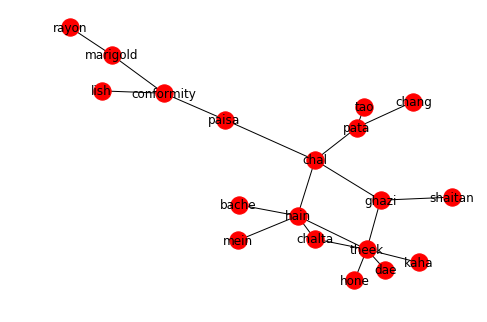

In [156]:
plotRandomWithNodes(19, coms_gn)

<h1> louvain

In [157]:
coms = louvain.best_partition(g)
coms_to_node = defaultdict(list)
for n, c in coms.items():
    coms_to_node[c].append(n)
coms_louvain = [tuple(c) for c in coms_to_node.values()]

In [158]:
len(coms_louvain)

8628

In [175]:
louvainCount=count_(coms_louvain)

top 5 communities by length:  [1626, 1511, 1489, 1182, 1175]


3  total communities


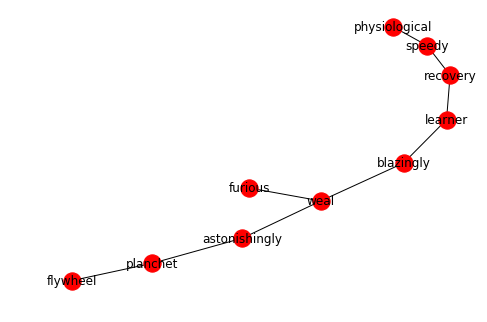

In [190]:
plotRandomWithNodes(10, coms_louvain)

1  total communities


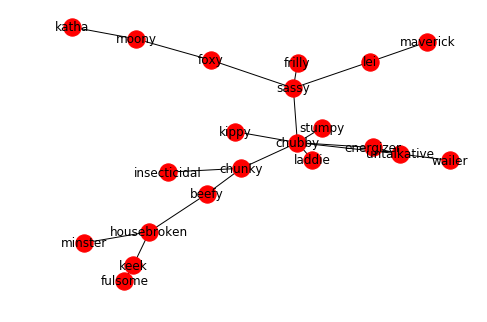

In [160]:
plotRandomWithNodes(21, coms_louvain)

15  total communities


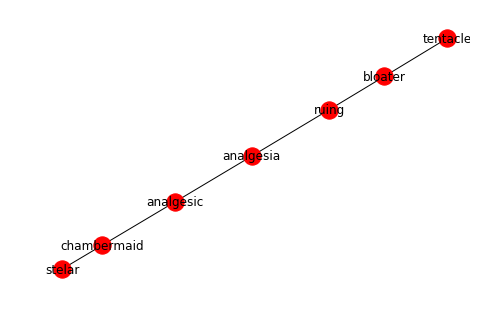

In [164]:
plotRandomWithNodes(7, coms_louvain)

1  total communities


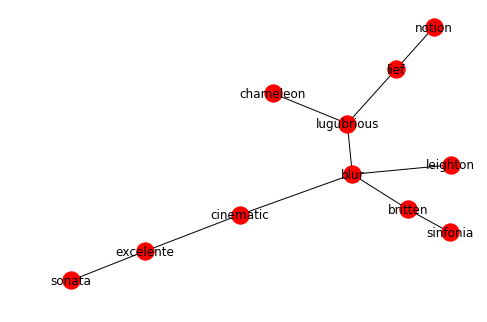

In [165]:
plotRandomWithNodes(11, coms_louvain)

<h1>label propagation

In [191]:
lp = list(community.label_propagation_communities(g))
lp = [tuple(x) for x in lp]

In [192]:
len(lp)

12957

In [193]:
lpCount=count_(lp)

top 5 communities by length:  [371, 342, 210, 203, 172]


In [194]:
lpCount.index(2)

2626

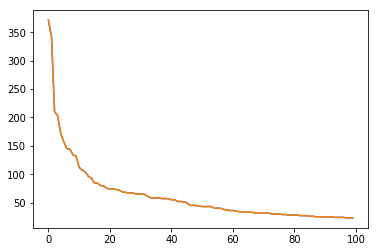

In [259]:
plt.plot(lpCount[:100])
plt.xlabel="#communities"
plt.ylabel="#nodes"
plt.show()

47  total communities


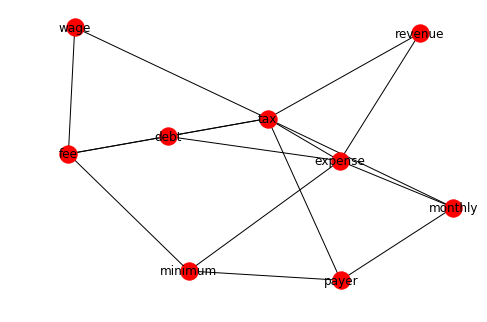

In [216]:
plotRandomWithNodes(9, lp)

91  total communities


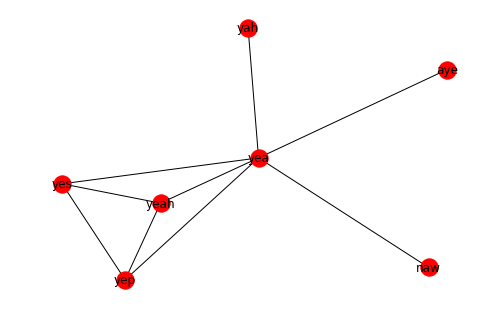

In [223]:
plotRandomWithNodes(7, lp)

<h1>k-clique

In [227]:
def getClique(g, k):
    kclique = list(community.k_clique_communities(g, k))
    kclique = [tuple(x) for x in kclique]
#     print("Found "+ str(len(kclique)) + " cliques")
    return kclique

In [234]:
cliqueLengths=[]
for i in range(2,50):
    temp=len(getClique(g,i))
    if temp==0:
        continue
    cliqueLengths.append((i, temp))

In [235]:
cliqueLengths

[(2, 1171), (3, 1342), (4, 494), (5, 155), (6, 44), (7, 17), (8, 6), (9, 3)]

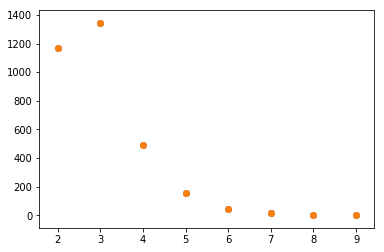

In [255]:
plt.scatter(*zip(*cliqueLengths))
plt.xlabel="k"
plt.ylabel="number of cliques found"
plt.show()

In [250]:
clique=getClique(g,6)

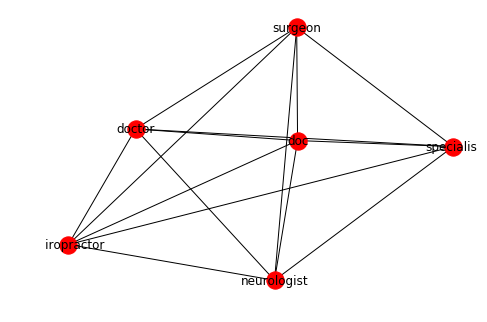

In [251]:
nx.draw(g.subgraph(clique[7]), with_labels=True)
plt.show()

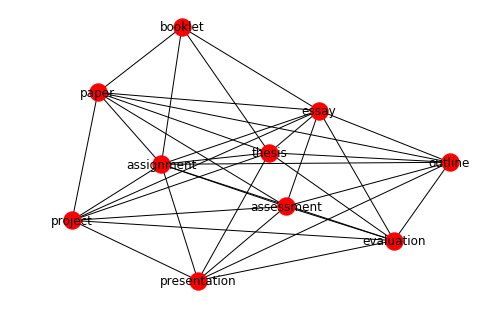

In [269]:
clique=getClique(g,5)
nx.draw(g.subgraph(clique[23]), with_labels=True)
plt.show()

<h1>demon

In [270]:
import demon as dm
d = dm.Demon(graph=g, min_community_size=6,epsilon=0.5)
coms_demon = d.execute()

Exec: 100%|████████████████████████

Time:  'execute' 10.92 sec
------------------------------------


In [271]:
len(coms_demon)

424

In [273]:
demonCount=count_(coms_demon)

top 5 communities by length:  [153, 128, 118, 103, 103]


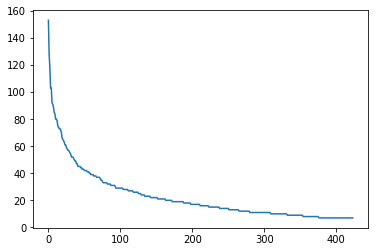

In [277]:
plt.plot(demonCount)
plt.xlabel="communities"
plt.ylabel="#nodes"
plt.show()

22  total communities


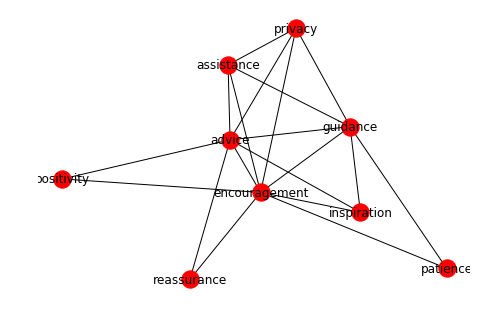

In [272]:
plotRandomWithNodes(9, coms_demon)

22  total communities


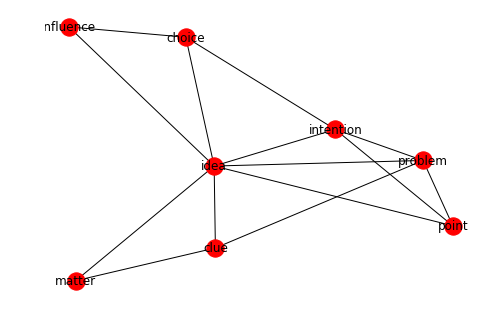

In [292]:
plotRandomWithNodes(8, coms_demon)

In [278]:
import pquality

In [279]:
results = pquality.pquality_summary(g, coms)
results['Indexes']

min        max       avg       std
Index                                               
Internal Density  0.0   0.000000  0.000000  0.000000
Edges inside      0.0   0.000000  0.000000  0.000000
Average Degree    0.0   0.000000  0.000000  0.000000
FOMD              0.0   0.000000  0.000000  0.000000
TPR               0.0   0.000000  0.000000  0.000000
Expansion         0.0  69.000000  3.342644  4.571022
Cut Ratio         0.0   0.002193  0.000106  0.000145
Conductance       0.0   1.000000  0.765494  0.423690
Normalized Cut    0.0   1.000656  0.765526  0.423707
Maximum-ODF       0.0  69.000000  3.342644  4.571022
Average-ODF       0.0  69.000000  3.342644  4.571022
Flake-ODF         0.0   1.000000  0.765494  0.423690

In [280]:
results['Modularity']

value
Index                                
Modularity (no overlap) -1.110813e-07

<h1>comparing partitions

In [303]:
from sklearn.metrics import normalized_mutual_info_score

In [304]:
def nmi_preprocess(partition):
    return [x[1] for x in sorted([(node,nid) for nid, cluster in enumerate(partition) for node in cluster], 
                                 key=lambda x: x[0])]

In [305]:
lp_labels = nmi_preprocess(lp)
louvain_labels = nmi_preprocess(coms_louvain)
gn_labels = nmi_preprocess(coms_gn)

In [306]:
normalized_mutual_info_score(lp_labels, louvain_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.79020313218490223

In [307]:
normalized_mutual_info_score(gn_labels, lp_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.64306764065275945

In [308]:
normalized_mutual_info_score(gn_labels, louvain_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.77794362688557406

In [328]:
import pandas as pd
import seaborn as sn

In [329]:
array=[
    [1,normalized_mutual_info_score(lp_labels, louvain_labels), normalized_mutual_info_score(gn_labels, lp_labels)],
    [normalized_mutual_info_score(lp_labels, louvain_labels), 1, normalized_mutual_info_score(gn_labels, louvain_labels)],
    [normalized_mutual_info_score(gn_labels, lp_labels),normalized_mutual_info_score(gn_labels, louvain_labels),1]
]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


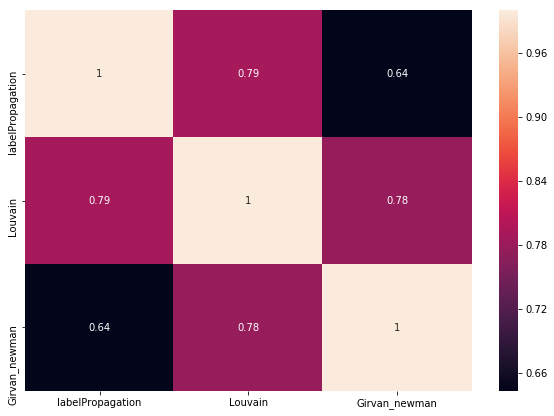

In [334]:
df_cm = pd.DataFrame(array, index = [i for i in ['labelPropagation', 'Louvain', 'Girvan_newman']],
                  columns = [i for i in ['labelPropagation', 'Louvain', 'Girvan_newman']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

<h2>nf1 score

In [309]:
from nf1 import NF1

In [310]:
nf = NF1(lp, coms_louvain)
results = nf.summary()

In [311]:
results['scores']

Value
Index                                 
Ground Truth Communities   8628.000000
Identified Communities    12957.000000
Community Ratio               1.501739
Ground Truth Matched          1.000000
Node Coverage                 1.000000
NF1                           0.437799

In [312]:
results['details']

F1 min  F1 max  F1 mean  F1 mode    F1 std
0     0.0     1.0  0.65746      1.0  0.463479

<h1>fun with "ego"

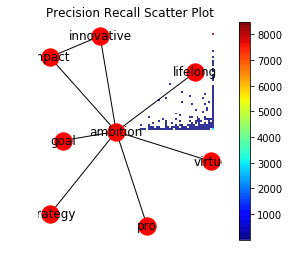

In [317]:
ego = nx.ego_graph(g, 'ambition')
nx.draw(ego, with_labels=True)
plt.show()

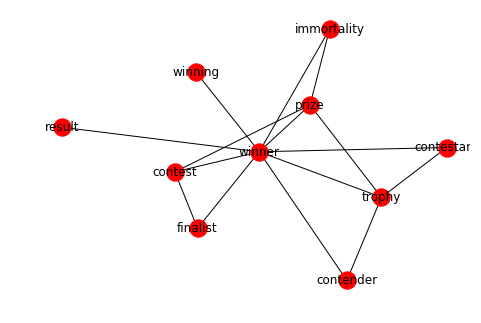

In [318]:
ego = nx.ego_graph(g, 'winner')
nx.draw(ego, with_labels=True)
plt.show()

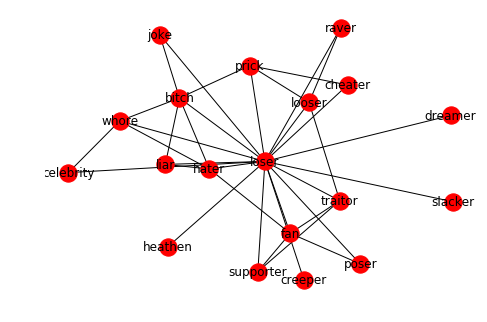

In [319]:
ego = nx.ego_graph(g, 'loser')
nx.draw(ego, with_labels=True)
plt.show()

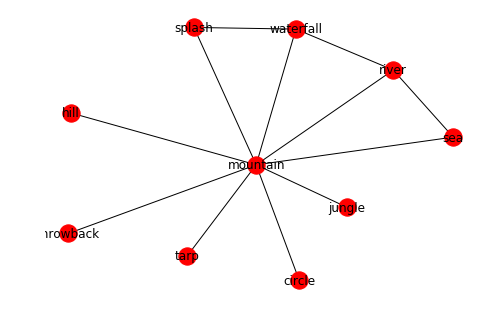

In [320]:
ego = nx.ego_graph(g, 'mountain')
nx.draw(ego, with_labels=True)
plt.show()

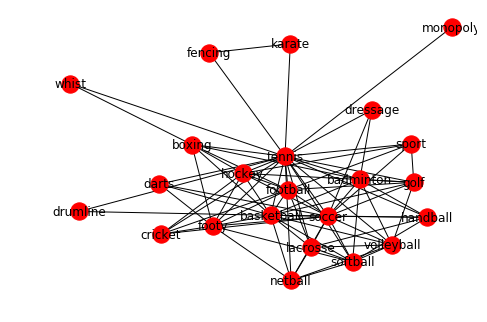

In [321]:
ego = nx.ego_graph(g, 'tennis')
nx.draw(ego, with_labels=True)
plt.show()